<a href="https://colab.research.google.com/github/janorena/modelado-y-simulacion/blob/master/Git_terminado_PROYECTO_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jorge Andrés Noreña García - 816543

# TRATAMIENTO ANALÍTICO DE LA BIFURCACIÓN DE HOPF EN UNA EXTENSIÓN DEL SISTEMA DE LÜ

## Resumen
En este artículo se hace un análisis de la bifurcación de Hopf del sistema tridimensional tipo Lorenz introducido por Xianyi Li y Qianjun Ou (2011), este análisis consiste en identificar una región de parámetros del sistema donde la bifurcación de Hopf es no degenerada y supercrítica, aspecto que no es abordado en el artículo de Xianyi Li y Qianjun Ou.

Para lograr este objetivo se utiliza el Teorema de la Variedad Central y el Teorema de Hopf. Además, para ilustrar los resultados, se muestran gráficas de algunas trayectorias del sistema, las cuales fueron obtenidas mediante simulación numérica.

##Palabras clave:
sistema tipo Lorenz; teorema de la variedad central; teorema de la bifurcación de Hopf.

# 1) Introducción
El sistema de Lorenz fue estudiado por el metereólogo Edward Norton Lorenz cuando investigaba modelos matemáticos para predecir el comportamiento de los gases en la atmósfera. Desde entonces han aparecido en la literatura sistemas caóticos con estructura similar al de Lorenz a los que se les ha llamado sistemas Tipo Lorenz: sistema de Chen, sistema de Lü, Li-Wang y otros.
Xianyi Li y Qianjun Ou en estudian el sistema Tipo Lorenz



$\begin{aligned} \dot{x} &=a(y-x) \\ \dot{y} &=d y-x z \\ \dot{z} &=g x y-b z+f x^{2} \end{aligned}$

El objetivo de este artículo es hacer un análisis de la bifurcación de Hopf del sistema de Li-Ou (1), cuando el parámetro f toma el valor cero. Para lograr este propósito se utiliza una técnica clásica que hace uso del Teorema de la Variedad Central y del Teorema de Hopf, dicha técnica ha sido empleada en. 
El aporte principal de este trabajo consiste en mostrar analíticamente y con ejemplos la existencia de una región de los parámetros en donde el sistema (1) presenta la bifurcación de Hopf supercrítica. Por otra parte, el sistema en estudio es una extensión del sistema de Lü, pues éste se obtiene de (1) haciendo f = 0 y g = 1.

El análisis de la bifurcación de Hopf es de importancia en el estudio de la estabilidad de sistemas dinámicos, pues determina la estabilidad de las órbitas periódicas del sistema. Por otra parte, cuando la estabilidad de una órbita periódica no es la deseada, se usan técnicas para perturbar el sistema con el propósito de cambiar su estabilidad, a lo que se le denomina control de la bifurcación. Es así como el análisis de la bifurcación de Hopf es de utilidad en la teoría del control de la bifurcación.


# 2) Propiedades del sistema
Li y Ou en [13] encontraron para el sistema (1) que para los parámetros $(a, b, d, f, g)=(10,3,6,1,0)$, se observa que dos de estos exponentes son mayores de cero lo que caracteriza la aparición de una orbita caótica. En la Figura 1 se muestra un atractor caótico del sistema, la gráfica corresponde a la órbita con condición inicial $(x, y, z)=\left(\frac{23}{20}, \frac{33}{10}, \frac{7}{2}\right)$

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from time import time
%matplotlib inline

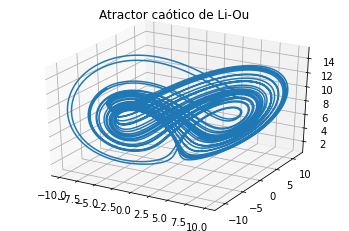

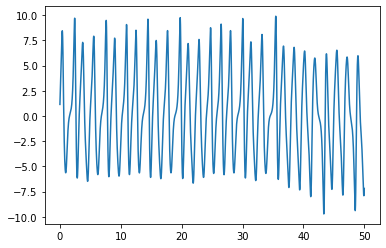

In [ ]:
def Lorenz_equation1(t,xyz,a,b,d,f,g):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_lorenz(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y

tend=50
val_ini=[23/20,33/10,7/2]
t = np.linspace(0,tend,10000)
a,b,d,f,g = 10, 3, 6, 1, 0
sol_leq = solve_ivp(Lorenz_equation1,[0,tend],val_ini,args=(a,b,d,f,g),t_eval=t, events = event_lorenz)

fig, (ax2) = plt.subplots(1, sharex=True)
ax2 = plt.axes(projection='3d')
ax2.plot3D(sol_leq.y[0],sol_leq.y[1],sol_leq.y[2])

plt.title('Atractor caótico de Li-Ou')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])


En adelante se restringe el análisis al caso $b d>0$ y $f=0$. Li y Ou verificaron que en $P_{0}$ el sistema (1) presenta una dinámica sin bifurcación y que en los puntos de equilibrio $P_{1}$ y $P_{2}$ el sistema presenta bifurcación de Hopf, en particular, demostraron que cuando $b>0$ sólo hay un valor crítico de bifurcación,
$$d_{-}=\frac{a+b}{3} .$$

## Teorema 1

Cuando $a>0, b>0, d>0, f=0$ y $g>0,$ las siguientes afirmaciones son válidas para el sistema (1)
1. Cuando $0<d<\frac{a+b}{3},$ los puntos de equilibrio $P_{1}$ y $P_{2}$ son asintóticamente estables.
2. Cuando $\frac{a+b}{3}<d,$ los equilibrios $P_{1}$ y $P_{2}$ son inestables.
3. Cuando $d=\frac{a+b}{3}$, en cada equilibrio $P_{1}$ y $P_{2}$ surge una órbita periódica con periodo $T=\frac{2 \pi}{\sqrt{a b}}$
Por lo tanto el sistema presenta bifurcación de Hopf.

# 3) Análisis de la bifurcación de Hopf

* Una bifurcación de Hopf es un punto crítico donde la estabilidad de un sistema cambia y surge una solución periódica. Más exactamente, se trata de una bifurcación local en la que un punto fijo de un sistema dinámico pierde estabilidad, cuando un par de autovalores complejos conjugados de la linealización alrededor del punto fijo, cruza el eje imaginario del plano complejo.
* Bajo supuestos razonablemente genéricos sobre el sistema dinámico, un ciclo límite de pequeña amplitud se ramifica desde el punto fijo.
Esta sección se dedica a demostrar que la bifurcación de Hopf del sistema (1) cuya existencia se afirma en el Teorema 1 es no degenerada y supercritica.

## Resultados


para el caso 1 \\
$(a, b, d, f, g)=(\frac{6}{10}, \frac{6}{10}, \frac{3}{10}, 0, 2)$ \\
$(x, y, z)=\left(\frac{1}{4}, \frac{1}{4}, \frac{89}{100}\right)$


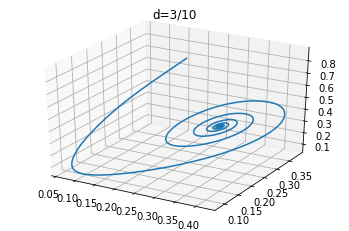

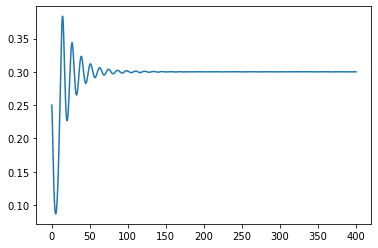

In [ ]:
#SIN PARAMETRO DE ANTICONTROL
def Lorenz_equation(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_hopf(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y

a,b,d,f,g = 6/10, 6/10, 3/10, 0, 2
tend= 400
val_ini=[1/4,1/4,89/100]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(a,b,d,g,f),t_eval=t, events = event_hopf)

ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[1],sol_leq.y[0],sol_leq.y[2])
plt.title('d=3/10')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])

para el caso 2 \\
$(a, b, d, f, g)=(\frac{6}{10}, \frac{6}{10}, \frac{1}{2}, 0, 2)$ \\
$(x, y, z)=\left(\frac{1}{4}, \frac{1}{4}, \frac{89}{100}\right)$

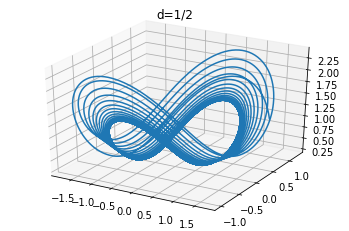

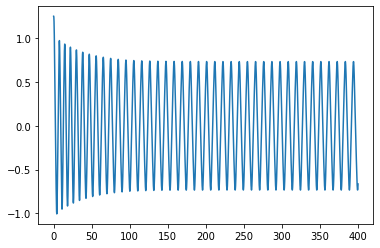

In [ ]:
#SIN PARAMETRO DE ANTICONTROL
def Lorenz_equation(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_hopf(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y

a,b,d,f,g = 6/10, 6/10, 1/2, 0, 2
tend= 400
val_ini=[5/4,5/4,89/100]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(a,b,d,g,f),t_eval=t, events = event_hopf)

ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[1],sol_leq.y[0],sol_leq.y[2])
plt.title('d=1/2')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])

para el caso 3 \\
$(a, b, d, f, g)=(\frac{6}{10}, \frac{6}{10}, \frac{2}{5}, 0, 2)$ \\
$(x, y, z)=\left(\frac{1}{4}, \frac{1}{4}, \frac{89}{100}\right)$

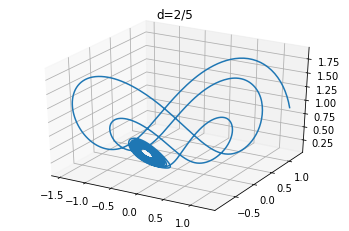

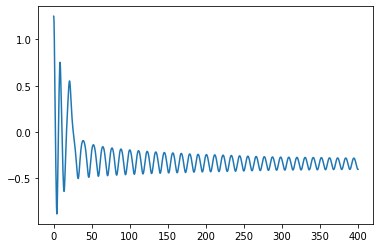

In [ ]:
#SIN PARAMETRO DE ANTICONTROL
def Lorenz_equation(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_hopf(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y
event_hopf.direction=-1
a,b,d,f,g = 6/10, 6/10, 2/5, 0, 2
tend= 400
val_ini=[5/4,5/4,89/100]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(a,b,d,g,f),t_eval=t, events = event_hopf)

ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[1],sol_leq.y[0],sol_leq.y[2])
plt.title('d=2/5')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])


## Teorema 2
Cuando los parámetros satisfacen $b>0, a=b, d=\frac{a+b}{3}, f=0 y$ $g>0,$ el sistema (1) presenta bifurcación de Hopf no degenerada y supercritica en los puntos de equilibrio $P_{1}$ y $P_{2}$.

## Demostración
Demostración. Bajo las condiciones establecidas en los parámetros, el Teorema 1 garantiza la existencia de la bifurcación de Hopf del sistema en los puntos $P_{1}$ y $P_{2}$. Se demostrará que la bifurcación de Hopf es supercrítica verificando que el primer coeficiente de Lyapunov es negativo en el punto de equilibrio $P_{1}$. Como consecuencia de la simetría del sistema, la conclusión es la misma para el equilibrio $P_{2}$.

La matriz jacobiana $A$ del sistema (1), en el punto $P_{1}$, con las condiciones sobre los parámetros toma la forma,
$$
A=\left(\begin{array}{ccc}
-a & a & 0 \\
-d_{-} & d_{-} & -h \\
g h & g h & -a
\end{array}\right), \text { con } h=\sqrt{\frac{a d_{-}}{g}}
$$

el polinomio característico asociado a la matriz A está dado por,
$$
p(\lambda)=\lambda^{3}+\left(2 a-d_{-}\right) \lambda^{2}+a^{2} \lambda+2 a^{2} d_{-}
$$

Como consecuencia del Teorema de Hopf $\mathrm{y}$ de las condiciones en los parámetros se sigue que $p(\lambda)$ tiene un par de raíces imaginarias conjugadas $\lambda_{1}=\omega i \mathrm{y}$ $\lambda_{2}=-\omega i .$ Por otra parte, las raíces del polinomio característico $p(\lambda),$ deben satisfacer las siguientes relaciones:
$$
\begin{aligned}
\lambda_{1}+\lambda_{2}+\lambda_{3} &=-\left(2 a-d_{-}\right), (2) \\
\lambda_{1} \lambda_{2}+\lambda_{2} \lambda_{3}+\lambda_{1} \lambda_{3} &=a^{2}, (3) \\
\lambda_{1} \lambda_{2} \lambda_{3} &=-2 a^{2} d_{-}, (4)
\end{aligned}
$$

De (2) se obtiene la tercer raíz $\lambda_{3}=-\frac{4}{3} a$, la cual es negativa dado que $a>0$. Entonces la ecuación (4) se reescribe como
$$
(\omega i)(-\omega i)\left(-\frac{4}{3} a\right)=-\frac{4}{3} a^{3}
$$
y se obtiene $\omega=a$.\
Al solucionar el sistema $A q=a i q,$ se obtiene el vector propio complejo,


$$
q=\left(\begin{array}{c}
a h \\
a h+a h i \\
a^{2}-\frac{1}{3} a^{2} i
\end{array}\right)
$$
y de la solución del sistema $A v=\lambda_{3} v$, resulta el vector propio real
$$
v=\left(\begin{array}{c}
3 a h \\
-a h \\
-4 a^{2}
\end{array}\right)
$$
La matriz $P=[\operatorname{Im}(q) ; \operatorname{Re}(q) ; v]$ asociada a los vectores propios y su inversa
son:

$$
\begin{aligned}
P &=\left(\begin{array}{ccc}
0 & a h & 3 a h \\
a h & a h & -a h \\
-\frac{1}{3} a^{2} & a^{2} & -4 a^{2}
\end{array}\right) \\
P^{-1} &=\frac{3}{25 a^{2}}\left(\begin{array}{ccc}
\frac{-3 a}{h} & \frac{7 a}{h} & -4 \\
\frac{13 a}{3 h} & \frac{a}{h} & 3 \\
\frac{4 a}{3 h} & \frac{-a}{3 h} & -1
\end{array}\right)
\end{aligned}
$$

Se traslada el punto de equilibrio $P_{1}=\left(h, h, \frac{2 a}{3}\right)$ al origen mediante la transformación $x=h+y_{1}, y=h+y_{2}, z=\frac{2 a}{3}+y_{3},$ obteniendo:
$$
\dot{Y}=\left(\begin{array}{ccc}
-a & a & 0 \\
-\frac{2 a}{3} & \frac{2 a}{3} & -h \\
g h & g h & -a
\end{array}\right) Y+y_{1} B Y , (5)
$$
donde $Y=\left(y_{1}, y_{2}, y_{3}\right)^{T}$ y $B=\left(\begin{array}{ccc}0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & g & 0\end{array}\right)$\
Para simplificar el sistema (5) se hace el cambio de variable $Y=P Z$, obteniendo el nuevo sistema
$$
\dot{Z}=\left(\begin{array}{ccc}
0 & -\omega & 0 \\
\omega & 0 & 0 \\
0 & 0 & -\frac{4}{3} a
\end{array}\right) Z+a h\left(z_{2}+3 \mu\right) P^{-1} B P Z, (6)
$$

donde $Z=\left(z_{1}, z_{2}, \mu\right)^{T} .$ El sistema (6) tiene ahora la forma $\dot{Z}=J Z+F(Z)$ con la matriz de Jordan $J=P^{-1} A P$ y el término no lineal,
$$
\begin{aligned}
F(Z) &=a h\left(z_{2}+3 \mu\right) P^{-1} B P Z \\
&=\frac{-a^{2}\left(z_{2}+3 \mu\right)}{25}\left(\begin{array}{ccc}
1 & 29 & -92 \\
-7 & -3 & -6 \\
\frac{7}{3} & 1 & 2
\end{array}\right)\left(\begin{array}{c}
z_{1} \\
z_{2} \\
\mu
\end{array}\right)
\end{aligned}
$$

además $\left(z_{1}, z_{2}\right)$ pertenece al subespacio central y $\mu$ está en el subespacio estable. Como consecuencia del Teorema de la Variedad Central, existe $\delta>0$ y una función $H$ en una vecindad del origen $N_{\delta}(0),$ que define la variedad central local
$$
W^{c}(0)=\left\{\left(z_{1}, z_{2}, \mu\right): \mu=H\left(z_{1}, z_{2}\right) \text { para }\left\|\left(z_{1}, z_{2}\right)\right\|<\delta\right\}
$$
Para el cálculo de la variedad central del sistema (6) se propone la expresión $H\left(z_{1}, z_{2}\right)=a_{1} z_{1}^{2}+a_{2} z_{1} z_{2}+a_{3} z_{2}^{2}, \quad$
El cálculo de los coeficientes $a_{1}, a_{2}$ y $a_{3}$ se obtienen de derivar $\mu$ como sigue,
$$
\dot{\mu}=\frac{\partial H}{\partial z_{1}} \dot{z}_{1}+\frac{\partial H}{\partial z_{2}} \dot{z}_{2}, (7)
$$
se calculan las derivadas parciales de $H$ y se reemplazan junto con $\dot{z}_{1}, \dot{z}_{2}, \dot{\mu}$ de
(6) en (7), se soluciona el sistema resultante y se obtiene
$$
\begin{aligned}
a_{1} &=\frac{42 a^{3}-27 a^{4}}{200\left(4+9 a^{2}\right)} \\
a_{2} &=\frac{-14 a^{2}+9 a^{3}}{50\left(4+9 a^{2}\right)} \mathrm{y} \\
a_{3} &=\frac{-24 a^{2}-42 a^{3}-27 a^{4}}{200\left(4+9 a^{2}\right)}
\end{aligned}
$$

Otra consecuencia del Teorema de la Variedad Central es que el flujo en la variedad central está definido por el sistema de ecuaciones diferenciales,
$$
\begin{array}{l}
\qquad \begin{aligned}
\dot{z}_{1} &=-\omega z_{2}+F_{1}\left(z_{1}, z_{2}\right) \\
\dot{z}_{2} &=\omega z_{1}+F_{2}\left(z_{1}, z_{2}\right) ,(8)
\end{aligned} \\
\text { con }\left\|\left(z_{1}, z_{2}\right)\right\|<\delta, F_{1}(0)=F_{2}(0)=0, D F_{1}(0)=D F_{2}(0)=0, \mathrm{y} \text { por }(6) \\
F_{1}\left(z_{1}, z_{2}\right)=-\frac{a^{2}}{25}\left[z_{1} z_{2}+29 z_{2}^{2}-5 z_{2} H\left(z_{1}, z_{2}\right)+3 z_{1} H\left(z_{1}, z_{2}\right)-276 H^{2}\left(z_{1}, z_{2}\right)\right] \\
F_{2}\left(z_{1}, z_{2}\right)=-\frac{a^{2}}{25}\left[-7 z_{1} z_{2}-3 z_{2}^{2}-15 z_{2} H\left(z_{1}, z_{2}\right)-21 z_{1} H\left(z_{1}, z_{2}\right)-18 H^{2}\left(z_{1}, z_{2}\right)\right]
\end{array}
$$
Para el cálculo del primer coeficiente de Lyapunov $\ell_{1},$ se usa la fórmula de Guckenheimer [10, Pág. 152 ]
$$
\ell_{1}=\frac{1}{16}\left(R_{1}+\frac{R_{2}}{\omega}\right), (9)
$$
cuando\
$$
\begin{aligned}
R_{1}=& F_{1 z_{1} z_{1} z_{1}}+F_{1 z_{1} z_{2} z_{2}}+F_{2 z_{1} z_{1} z_{2}}+F_{2 z_{2} z_{2} z_{2}} \\
R_{2}=& F_{1 z_{1} z_{2}}\left(F_{1 z_{1} z_{1}}+F_{1 z_{2} z_{2}}\right)-F_{2 z_{1} z_{2}}\left(F_{2 z_{1} z_{1}}+F_{2 z_{2} z_{2}}\right)-F_{1 z_{1} z_{1}} F_{2 z_{1} z_{1}} \\
&+F_{1 z_{2} z_{2}} F_{2 z_{2} z_{2}}
\end{aligned}
$$
El primer coeficiente de Lyapunov para el sistema (8) toma la forma,
$$
\ell_{1}(0)=-\frac{142}{65} a^{2}<0
$$
puesto que éste es negativo, como consecuencia del Teorema de Hopf, la órbita periódica es estable.

Dado que en la variedad central el sistema (1) es topológicamente equivalente al sistema (8), la órbita periódica del sistema (1) es estable, por lo tanto la bifurcación de Hopf del sistema de Li-Ou es no degenerada y supercrítica.

* teoria obtenida de: P. CALDERÓN — E. MUÑOZ — J. ÁLVAREZ, REVISTA DE MATEMÁTICA: TEORÍA Y APLICACIONES, (2016).

##Ejemplo 2 
Para ilustrar el Teorema 2 se presenta un sistema particular $y$ la gráfica de la órbita con condición inicial $(x, y, z)=\left(\frac{5}{4}, \frac{5}{4}, \frac{89}{100}\right) .$ Cuando los parámetros son $\quad(a, b, d, f, g)=\left(\frac{1}{2}, \frac{1}{2}, \frac{1}{3}, 0,2\right),$ se satisfacen las condiciones $b>0, b=a, f=0, g>0 y d=\frac{a+b}{3},$ entonces el Teorema asegura la presencia de una órbita periódica estable. La órbita de la Figura 3 da evidencia de una orbita periódica estable.

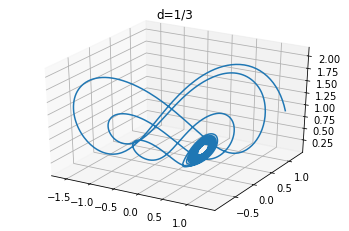

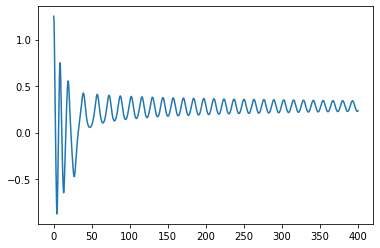

In [ ]:
def Lorenz_equation(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_hopf(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y
event_hopf.direction=-1
a,b,d,f,g = 1/2, 1/2, 1/3, 0, 2
tend= 400
val_ini=[5/4,5/4,89/100]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(a,b,d,g,f),t_eval=t, events = event_hopf)

ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[1],sol_leq.y[0],sol_leq.y[2])
plt.title('d=1/3')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])

## diagrama de bifurcacion

25.318984031677246


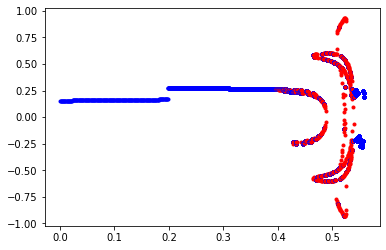

In [ ]:
def Lorenz_equation(t,xyz,a,b,d,f,g):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]
def event_hopf(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return ((y**2+0.5+(x**2)-0.9+(z))*0.5)*(y**2-2.5+z)*0.5*((x**2)-0.8+z*0.5)
#(x**2)-0.8+z*0.5
#(x**2)-0.5+z*0.5
#((y**2+0.5+(x**2)-0.9+(z))*0.5)*(y**2-2.5+z)*0.5*((x**2)-0.8+z*0.5)
event_hopf.direction=0
a_B,b_B,d_B,f_B,g_B = 6/10, 6/10, 2/5, 0, 2
t_end=150
t = np.linspace(0,t_end,1000)
val_ini=[1/4,1/4,89/100]
tic = time()
for d_B in np.arange(0,0.56,0.001):
  sol= solve_ivp(Lorenz_equation,[0,t_end],val_ini,args=(a_B,b_B,d_B,f_B,g_B),t_eval=t, events = event_hopf,rtol=1e-4,atol=1e-6)
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i] > (t_end-10):
      plt.plot(d_B,sol.y_events[0][i,0],".r")
    else:
      plt.plot(d_B,sol.y_events[0][-1,0],".b")   
toc=time()
print(toc-tic)

20.26566171646118


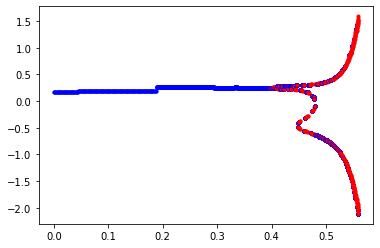

In [ ]:
def Lorenz_equation(t,xyz,a,b,d,f,g):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]
def event_hopf(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return (y-0.5+z)*0.5
event_hopf.direction=0
a_B,b_B,d_B,f_B,g_B = 6/10, 6/10, 2/5, 0, 2
t_end=150
t = np.linspace(0,t_end,1000)
val_ini=[1/4,1/4,89/100]
tic = time()
for d_B in np.arange(0,0.56,0.001):
  sol= solve_ivp(Lorenz_equation,[0,t_end],val_ini,args=(a_B,b_B,d_B,f_B,g_B),t_eval=t, events = event_hopf,rtol=1e-4,atol=1e-6)
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i] > (t_end-10):
      plt.plot(d_B,sol.y_events[0][i,0],".r")
    else:
      plt.plot(d_B,sol.y_events[0][-1,0],".b")   
toc=time()
print(toc-tic)

20.365715742111206


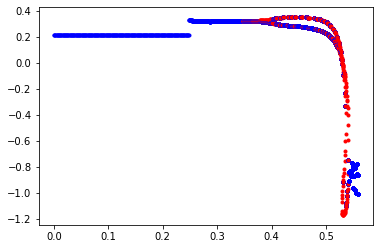

In [ ]:
def Lorenz_equation(t,xyz,a,b,d,f,g):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]
def event_hopf(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x-0.5+z*0.5
event_hopf.direction=0
a_B,b_B,d_B,f_B,g_B = 6/10, 6/10, 2/5, 0, 2
t_end=150
t = np.linspace(0,t_end,1000)
val_ini=[1/4,1/4,89/100]
tic = time()
for d_B in np.arange(0,0.56,0.001):
  sol= solve_ivp(Lorenz_equation,[0,t_end],val_ini,args=(a_B,b_B,d_B,f_B,g_B),t_eval=t, events = event_hopf,rtol=1e-4,atol=1e-6)
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i] > (t_end-10):
      plt.plot(d_B,sol.y_events[0][i,0],".r")
    else:
      plt.plot(d_B,sol.y_events[0][-1,0],".b")   
toc=time()
print(toc-tic)

# 4) Conclusiones
* Se demostró que en los puntos de equilibrio no hiperbólicos el sistema (1) experimenta la bifurcación de Hopf no degenerada y supercrítica en la región de parámetros $a>0, a=b, d=\frac{a+b}{3}, f=0$ y $g>0 .$ Los resultados de los Teoremas 1 y 2 se ilustraron gráficamente.
* En los diagramas de bifurcacion se puede ver los casos para cuando las soluciones son estables o inestables, siendo estables las cuales tienen sus diagramas como figuras lineales e inestables las que se representan con lineas punteadas, en estas podemos ver los momentos en los que empieza a entrar en claos, encontrando varias soliciones y perdiendo su periodicidad, saliendose de su punto de equilibrio y perdiendo su bifurcacion de hopf que es un punto crítico donde la estabilidad de un sistema cambia y surge una solución periódica.
* un analisis futuro podria ser un analisis mas detallado de los diagramas de bifurcaciones de hopf, donde en el sistema presentado hay otras regiones de parametros con bifurcacion que presentaria caos.

# Referencias

* P. CALDERÓN — E. MUÑOZ — J. ÁLVAREZ, REVISTA DE MATEMÁTICA: TEORÍA Y APLICACIONES, (2016).
* Algaba, A.; Domínguez, M.; Merino, M.; Rodríguez, A.L. (2015) “Study of the Hopf bifurcation in the Lorenz, Chen and Lü systems", Nonlinear Dyn. 79(1): 885–902.
* Algaba, A.; Fernández-Sánchez, F.; Merino, M.; Rodríguez, A.L. (2014)
“Centers on center manifolds in the Lorenz, Chen and Lü systems", Commun.
Nonlinear Sciences Numerical Simulation. 19(4): 772–775.
* Algaba, A.; Fernández-Sánchez, F.; Merino, M.; Rodríguez, A.L. (2013)
“The Lü systems is a particular case of the Lorenz system", Physical Letter
A. 377(39): 2771–2776.
* Castellanos, V.; Blé, G.; Llibre, J. (2016) “Existence of limit cicles in a
tritrophic food chain model with holling functional responses of type I and
II", Mathematical Methods in the Applied Sciences 39(1): 1–2.
* Chen, C.-T. (1994) System and Signal Analysis. Oxford University Press,
New York.
* Chen, G.; Lü, J. (2003) “Dynamics of the Lorenz family: analysis, control
and synchronization", Chinese Science Press, Beijing 00(1): 0–2.
* Chen, G.; Lü, J.; Cheng, D. (2004) “A new chaotic system and beyond:
The generalized Lorenz-like system", International Journal of Bifurcation
and Chaos 14(5): 1507–1537.
* Chen, G.; Oi, G. (2005) “Analysis of a new chaotic system", Physical A:
Statistical Mechanics and Its Applications 352(2): 295–308.
* Dutta, T.K.; Prajapati, P.; Haloi, S. (2016) “Supercritical and subcritical
hopf bifurcations in non linear maps", International Journal of Innovative
Research in Technology & Science 4(2): 14–20.
* Guckenheimer, J.; Holemes, P. (1990) “Nonlinear oscillations dynamical
systems and bifurcations of vectors fields”, Ithaca, Fall.
* Kuznetsov, Y. A. (2004) Elements of Applied Bifurcation Theory, third edition.
Springer-Verlag, New York.
* Li, H.; Wang, M. (2013) “Hopf bifurcation analysis in a Lorenz-type systems",
Nonlinear Dynamical 71(1): 235–240.
* Li, X.; Ou, Q. (2011) “Dynamical properties and simulation of a new
Lorenz-like chaotic system", Nonlinear Dynamical 65(3): 255–270.
* Liao, X.; Wang, L.; Yu, P. (2007) Stability of Dynamical Systems. London,
Canada.
* Lorenz, E. (1963) “Deterministic nonperiodic flow", J. Atmos. Sci. 20(2):
130–141.
* Pehlivan, I.; Uyaroglu, Y. (2010) “A new chaotic attractor from general
Lorenz system family and its electronic experimental implementation",
Turk J. Elec. Eng. & Comp. Sci. 18(2): 171–184.
* Perko, L. (2000) Differential Equations and Dynamical Systems, third edition.
Springer-Verlag, New York.
* Pyragas, K. (2006) “Delayed feedback control of chaos", Phil. Trans. R.
soc. A. 364(1846): 2309–2334.
* Soon Tee, L.; Salleh, Z. (2013) “Dynamical analysis of a modified
Lorenz system", Hindawwi Publishing Corporation Journal of Mathematics
2013(1): 1–8.
* Sotomayor, J.; Melo, L.; Braga, D. (2006) Stability and Hopf Bifurcation in
the Watt Governor Systems. Cornell University Library, orXiv: Matemáticas/
0604177
* Tian, Y.-P. (2012) Frequency-Domain Analysis and Desing of Distributed
Control Systems. Wiley-IEEE Press.
* Yan, Z. (2007) “Hopf bifurcation in the Lorenz-type chaotic system",
Chaos, Solitons & Fractals 31(5): 1135–1142.
* Yu, P.; Lü, J. (2010) “Bifurcation control for a class of Lorenz-like systems", International Journal of Bifurcation and Chaos 21(9): 2647–2664.

